In [ ]:
!pip3 install bpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.1/350.1 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 42.0 MB/s eta 0:00:00


In [ ]:
#code for blender
import bpy
import numpy as np

from PIL import Image
grey_img = Image.open("demo31.jpg").convert('L')

max_size=(500,500)
max_height=30
min_height=0

grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()

(W,H)=grey_img.size

vertices=[]
edges=[]
faces=[]

DX=1
DY=1

for Y in range(0, H, DY):
    for X in range(0,W,DX):
        pixelIntensity = imageNp[Y][X]
        Z = (pixelIntensity * max_height) / maxPix
        vertices.append((X,Y,Z))

for X in range(0, W-1, DX):
    for Y in range(0, H-1, DY):
        face_v1=X + Y*W
        face_v2=X + 1 + Y* W
        face_v3=X + 1 + (Y+1) * W
        faces.append((face_v1,face_v2,face_v3))
        
        face_v1= X+Y*W
        face_v2=X  + (Y+1)* W
        face_v3=X + 1 + (Y+1) * W
        faces.append((face_v1,face_v2,face_v3))
print(faces)
print(vertices)
new_mesh=bpy.data.meshes.new("new_mesh")
new_mesh.from_pydata(vertices,edges,faces)
new_mesh.update()
new_object = bpy.data.objects.new("new_object",new_mesh)
view_layer=bpy.context.view_layer
view_layer.active_layer_collection.collection.objects.link(new_object)

[]
[]
[]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import numpy as np
from stl import mesh

In [ ]:
import numpy as np

from PIL import Image
grey_img = Image.open("1.png").convert('L')

max_size=(500,500)
max_height=30
min_height=0

grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()

(W,H)=grey_img.size

print(f"W,H={W},{H}")
vertices=[]
edges=[]
faces=[]

DX=1
DY=1

for Y in range(0, H, DY):
    for X in range(0,W,DX):
        pixelIntensity = imageNp[Y][X]
        Z = (pixelIntensity * max_height) / maxPix
        vertices.append((X,Y,Z))
print(vertices)

W,H=500,500


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])

In [ ]:
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

In [ ]:
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        print(vertices[f[j],:])
        cube.vectors[i][j] = vertices[f[j]]

[-1 -1 -1]
[-1  1 -1]
[ 1 -1 -1]
[ 1 -1 -1]
[-1  1 -1]
[ 1  1 -1]
[-1 -1 -1]
[-1 -1  1]
[-1  1  1]
[-1 -1 -1]
[-1  1  1]
[-1  1 -1]
[-1 -1  1]
[ 1 -1  1]
[1 1 1]
[-1 -1  1]
[1 1 1]
[-1  1  1]
[ 1 -1  1]
[ 1 -1 -1]
[ 1  1 -1]
[ 1 -1  1]
[ 1  1 -1]
[1 1 1]
[ 1  1 -1]
[-1  1 -1]
[1 1 1]
[-1  1 -1]
[-1  1  1]
[1 1 1]
[-1 -1 -1]
[ 1 -1 -1]
[ 1 -1  1]
[-1 -1 -1]
[ 1 -1  1]
[-1 -1  1]


In [ ]:
cube.save('cube.stl')

In [ ]:
import numpy as np
from stl import mesh

# Using an existing closed stl file:
your_mesh = mesh.Mesh.from_file('cube.stl')

volume, cog, inertia = your_mesh.get_mass_properties()
print("Volume                                  = {0}".format(volume))
print("Position of the center of gravity (COG) = {0}".format(cog))
print("Inertia matrix at expressed at the COG  = {0}".format(inertia[0,:]))
print("                                          {0}".format(inertia[1,:]))
print("                                          {0}".format(inertia[2,:]))

Volume                                  = 8.0
Position of the center of gravity (COG) = [0. 0. 0.]
Inertia matrix at expressed at the COG  = [ 5.33333333 -0.         -0.        ]
                                          [-0.          5.33333333 -0.        ]
                                          [-0.         -0.          5.33333333]


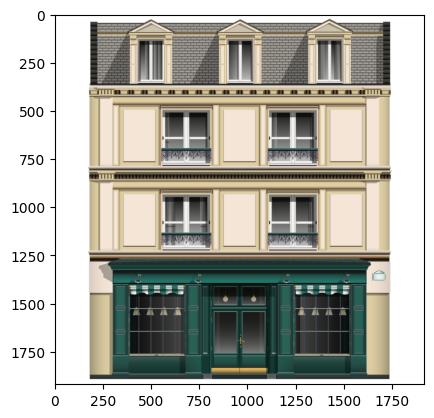

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("Building.png")
plt.imshow(im)

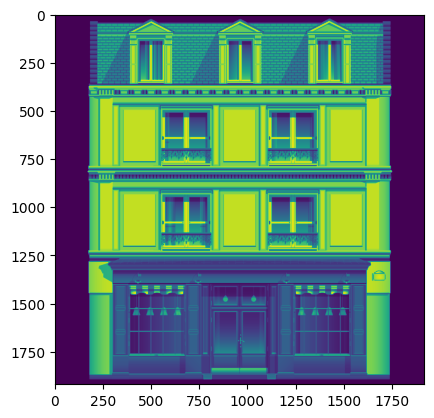

In [ ]:
grey_img = Image.open('Building.png').convert('L')
plt.imshow(grey_img)

In [ ]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1]])

# Define the 12 triangles composing the cube
faces = np.array([\
    [3,2,3],
    [3,1,0]
])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]+500

# Write the mesh to file cube.stl
cube.save('surface.stl')

In [ ]:
grey_img = Image.open('Building.png').convert('L')

max_size=(2500,2500)
max_height=30
min_height=0

grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()

print(imageNp)
(ncols,nrows)=grey_img.size

vertices=np.zeros((nrows,ncols,3))

for x in range(0, ncols):
  for y in range(0, nrows):
    pixelIntensity = imageNp[y][x]
    z = (pixelIntensity * max_height) / maxPix
    #print(imageNp[y][x])
    vertices[y][x]=(x, y, z)
faces=[]
for x in range(0, ncols - 1):
  for y in range(0, nrows - 1):
    # create face 1
    vertice1 = vertices[y][x]
    vertice2 = vertices[y+1][x]
    vertice3 = vertices[y+1][x+1]
    face1 = np.array([vertice1,vertice2,vertice3])

    # create face 2 
    vertice1 = vertices[y][x]
    vertice2 = vertices[y][x+1]
    vertice3 = vertices[y+1][x+1]
    face2 = np.array([vertice1,vertice2,vertice3])
    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]
# Write the mesh to file cube.stl
surface.save('surface.stl')
print(surface)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
number of faces: 7365122
<Mesh: '' 7365122 vertices>


In [ ]:
a = np.zeros((3, 3))
a[:,0]=3
print(a[:,0])

print(a)

[3. 3. 3.]
[[3. 0. 0.]
 [3. 0. 0.]
 [3. 0. 0.]]


In [ ]:
!ls -alh /content

total 44M
drwxr-xr-x 1 root root 4.0K May  4 03:55 .
drwxr-xr-x 1 root root 4.0K May  4 03:51 ..
-rw-r--r-- 1 root root  85K May  4 03:52 11.png
drwxr-xr-x 4 root root 4.0K May  2 13:36 .config
-rw-r--r-- 1 root root  684 May  4 04:39 cube.stl
drwxr-xr-x 2 root root 4.0K May  4 03:52 .ipynb_checkpoints
drwxr-xr-x 1 root root 4.0K May  4 03:54 sample_data
-rw-r--r-- 1 root root  44M May  4 04:41 surface.stl
